# Task #1: Understand the Problem Statement

* You own an ice cream business and you would like to create a model that could predit the daily revenue in dollors based on the outside air temperature (degC).
* Dataset:
  * Input (X): Outside Air Temperatue
  * Output (Y): Overall daily renevue generated in dollars

# Task #2: Import Libraries and Datasets

In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)

In [429]:
sales_df = pd.read_csv('data/IceCreamData.csv')

In [430]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [431]:
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [432]:
sales_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [433]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [434]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


## Practice Opportunity #1 (Optional):
* Calculate the average and maximum temperature and revenue using an alternative method

In [435]:
sales_df.Temperature.max()

45.0

In [436]:
sales_df.Temperature.mean()

22.232225113404002

In [437]:
sales_df.Revenue.max()

1000.0

In [438]:
sales_df.Revenue.mean()

521.57077669154

In [439]:
sales_df.max()

Temperature      45.0
Revenue        1000.0
dtype: float64

In [440]:
sales_df.mean()

Temperature     22.232225
Revenue        521.570777
dtype: float64

# Task #3: Perform Data Visualization

In [441]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


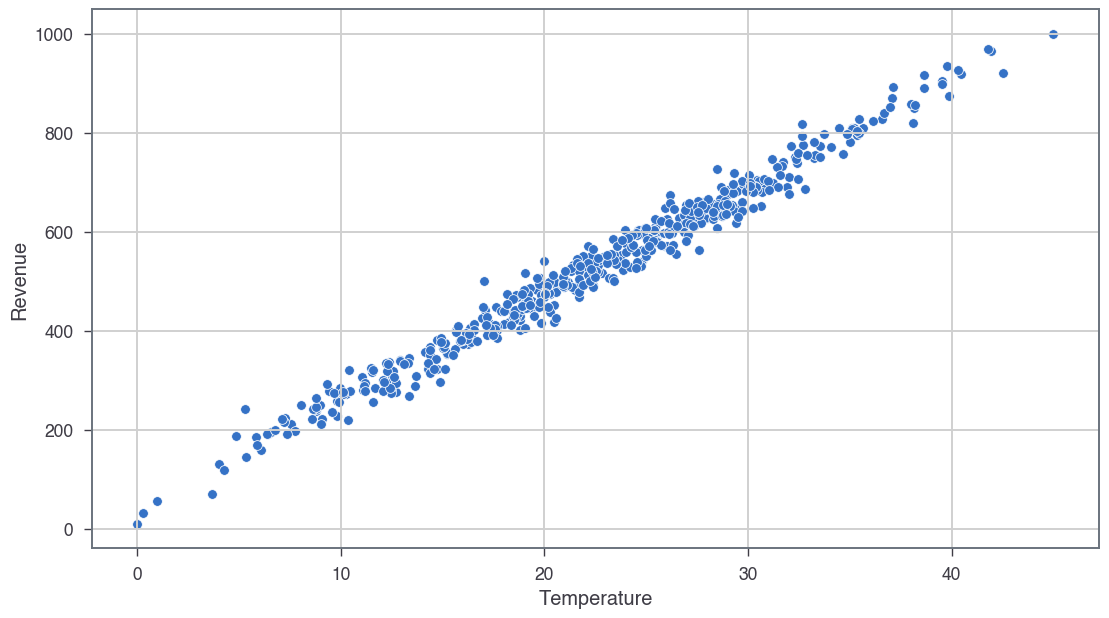

In [442]:
plt.figure(figsize = (13, 7))
sns.scatterplot(x = 'Temperature', y = 'Revenue', data = sales_df)
plt.grid()

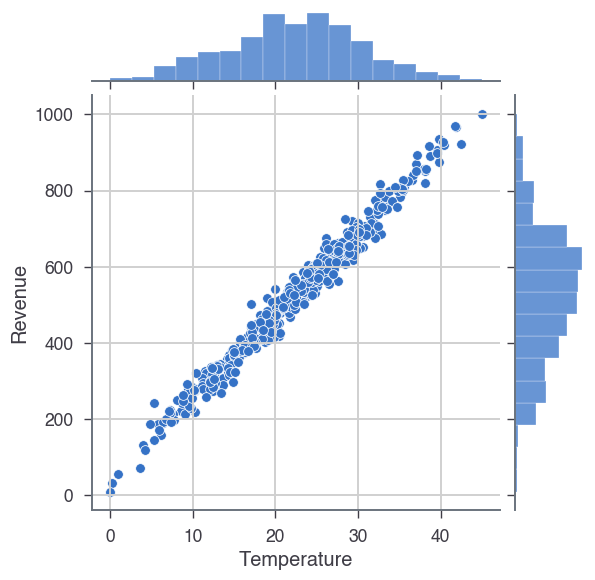

In [443]:
sns.jointplot(x = 'Temperature', y = 'Revenue', data = sales_df)
plt.grid()

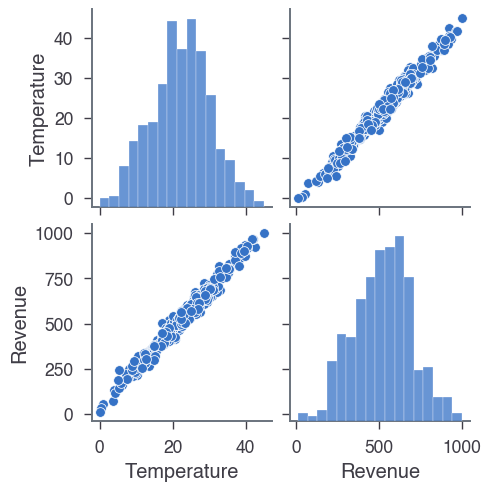

In [444]:
sns.pairplot(sales_df)
plt.grid()

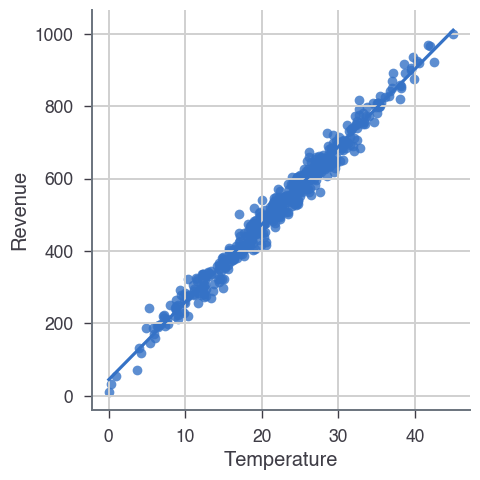

In [445]:
sns.lmplot(x = 'Temperature', y = 'Revenue', data = sales_df)
plt.grid()

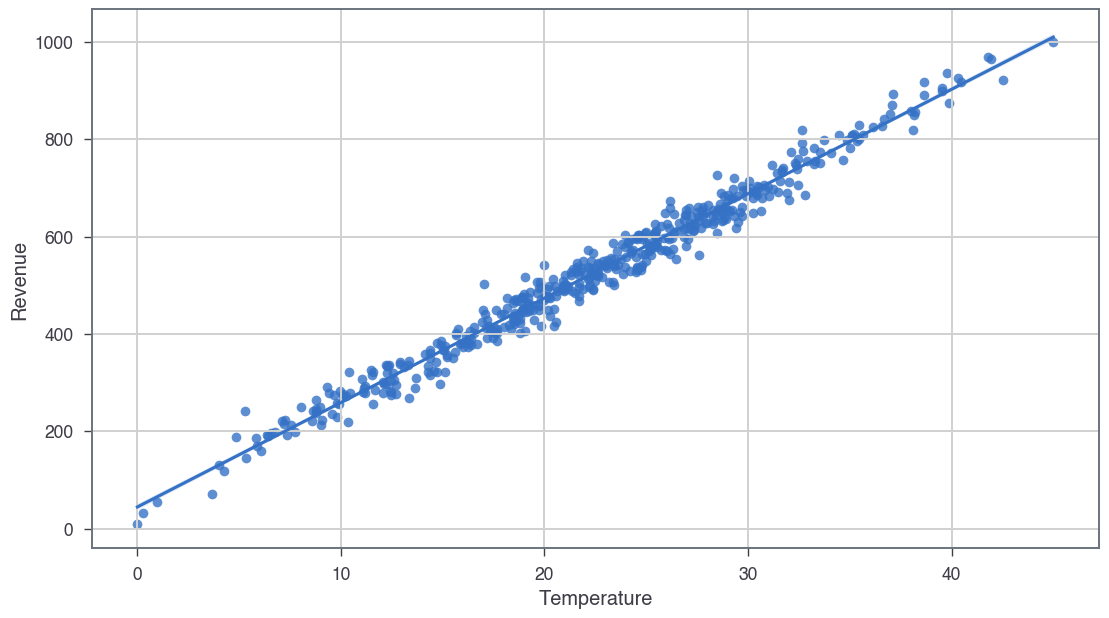

In [446]:
plt.figure(figsize=(13,7))
sns.regplot(x = 'Temperature', y = 'Revenue', data = sales_df)
plt.grid()

# Task #4 Create Testing and Training Dataset

In [447]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [448]:
X = sales_df['Temperature']
y = sales_df['Revenue']

In [449]:
X = np.array(X)
y = np.array(y)

In [450]:
print(X.shape)
print(y.shape)

(500,)
(500,)


In [451]:
# reshaping the array from (500, ) to (500, 1)
X = X.reshape(-1, 1)
print(X.shape)

# reshaping the array from (500, ) to (500, 1)
y = y.reshape(-1, 1)
print(y.shape)

(500, 1)
(500, 1)


In [452]:
# 下面通过sklearn将数据拆分为训练数据集和测试数据集
from sklearn.model_selection import train_test_split

# test_size的0.2表示将X和y的20%的数据分配为训练数据集和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [453]:
X_train.shape

(400, 1)

In [454]:
X_test.shape

(100, 1)

In [455]:
y_train.shape

(400, 1)

In [456]:
y_test.shape

(100, 1)

## Practice Opportunity #2 (optional):
  * Change the split ratio to allocate 30% for testing and 70% for training.
  * Confirm that the train test split process is successful.

In [457]:
# 将数据集拆分为30%的数据为测试数据，70%为训练数据；
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [458]:
X_train.shape

(400, 1)

In [459]:
X_test.shape

(100, 1)

In [460]:
y_train.shape

(400, 1)

In [461]:
y_test.shape

(100, 1)

# Task #5: Understand Theory Behind Simple Liner Regression

## Simple Linear Regression: Intution
  * In simple linear regression, we predict the value of one variable Y based on another variable X.
  * X is called the independant variable（自变量) and Y is called dependant variable（因变量）.
  * Why simple? Because it examines relationship between two variables only.
  * Why linear? when the independant variable increases ( or decreases), the dependant variable increase or decreases in a linear fashion.
  
  ![简单线性回归理论](images/Simple-Linear-Regression-Theory.png)

In [462]:
sales_df.head(11)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


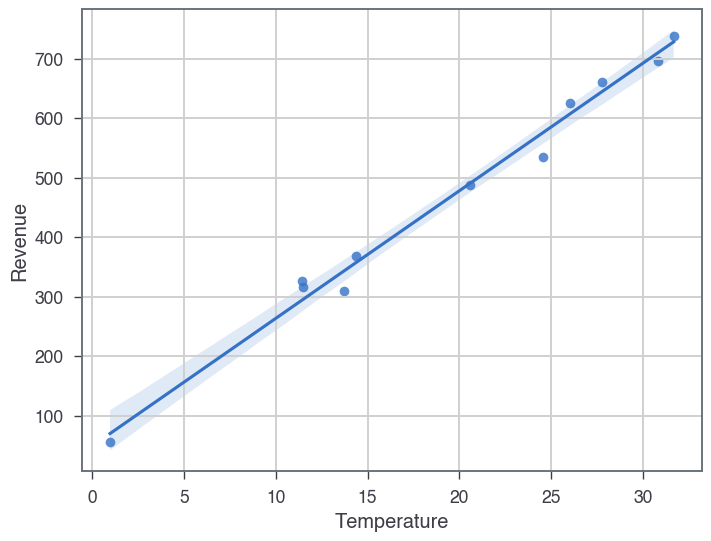

In [463]:
plt.figure(figsize = (8, 6))
sns.regplot(x = 'Temperature', y = 'Revenue', data = sales_df.head(11))
plt.grid()

## Simple Linear Regression: Some Meth!
  * Goal is to obtain a relationship (model) between outside air temperature and ice cream sales revenue
  * y = b + m * X, b 为截距， m 为斜率；

## How are we going to use the model?
  * Once the cofeeicients m and b are obtained, you have to obtained a simple linear regression model!
  * This "trained" model can be later used to predict any Revenue (dollars) based on the outside air Temperature.

# Task #6: Train A Simple Linear Regression Model in Scikit Learn

![LinearRegressionModel](images/LinearRegressionModel.png)

In [464]:
X_train.shape

(400, 1)

In [465]:
y_train.shape

(400, 1)

In [466]:
# 导入线性回归模型
from sklearn.linear_model import LinearRegression

SimpleLinearRegression = LinearRegression(fit_intercept=True)
SimpleLinearRegression.fit(X_train, y_train)

LinearRegression()

In [467]:
print('Linear Model Coeff(m)', SimpleLinearRegression.coef_)
print('Linear Model Coeff(b)', SimpleLinearRegression.intercept_)

Linear Model Coeff(m) [[21.44529822]]
Linear Model Coeff(b) [45.65554786]


## Practice Opportunity #3 (Optional):
  * Set the fit_intercept attribute to False and retrain the model. What do you notice? Comment on the result.

# Task #7: Evaluate Trained Simple Linear Regression Model in ScikitLearn

Text(0.5, 1.0, 'Revenue Generated vs. Temperature')

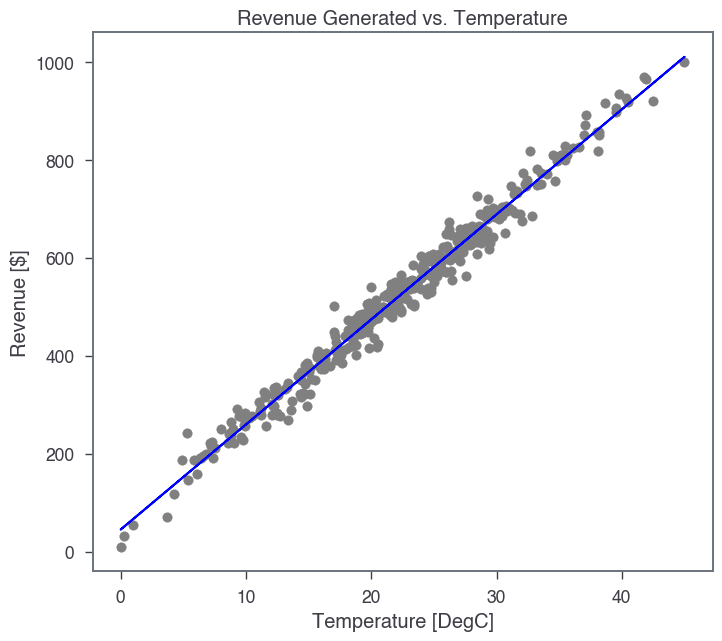

In [474]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, SimpleLinearRegression.predict(X_train), color = 'blue')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [DegC]')
plt.title('Revenue Generated vs. Temperature')

In [476]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_test, y_test)
accuracy_LinearRegression

0.978361017867745

In [477]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_train, y_train)
accuracy_LinearRegression

0.9799614221135889

Text(0.5, 1.0, 'Revenue Generated vs. Temperature')

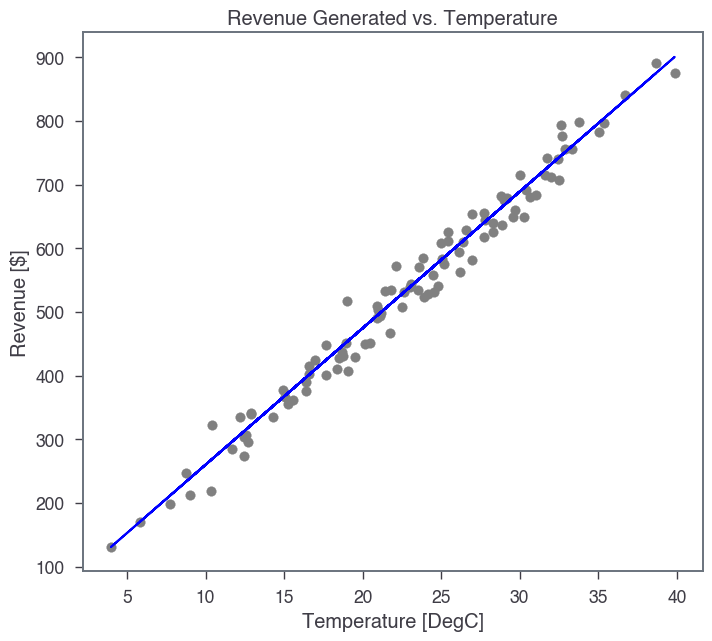

In [470]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, SimpleLinearRegression.predict(X_test), color = 'blue')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [DegC]')
plt.title('Revenue Generated vs. Temperature')

In [480]:
# 使用训练后的模型去预测数据

Temp = np.array([37])
Temp = Temp.reshape(-1,1)

# 传入Numpy的数组对象给训练模型

Revenue = SimpleLinearRegression.predict(Temp)
print('Revenue Predictions = ', Revenue)

Revenue Predictions =  [[839.13158212]]


## Practice Opportunity #4 (Optional):
  * Try at least 3 temperature values and record the output
  * Perform a sanity check and comment on your results!